## 予測  
実際に手書きひらがなの画像から、予測させる。

In [15]:
import tensorflow as tf
from PIL import Image
import numpy as np
import pandas as pd
from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from argparse import ArgumentParser
# cnnモデルのインポート
from Model import cnn_model_fn

### モデルの設定  
"model.py"に保存した"cnn_model_fn"をmodel_fnとして設定

In [16]:
model_dir = './model/etl8g_convnet_model'

In [ ]:
etl8g_classifier = tf.estimator.Estimator(
    model_fn=cnn_model_fn, model_dir=model_dir)

### 予測
予測させたい手書きの画像を開き、予測できる形にする。

In [18]:
image = Image.open('./pre_data/2.png')
predict_data = np.asarray(image).reshape(1, 1024).astype(np.float32)/255

In [19]:
predict_data

array([[0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

予測させる画像を可視化すると

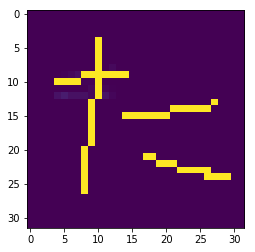

In [20]:
%matplotlib inline
def img_show(img):
    imshow(img)

img_show(predict_data.reshape(32, 32))

In [21]:
predict_input_fn = tf.estimator.inputs.numpy_input_fn(
    x={"x": predict_data},
    shuffle=False)

実際に予測させる。

In [22]:
predict_results = list(etl8g_classifier.predict(predict_input_fn))

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from ./model/etl8g_convnet_model/model.ckpt-33500
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


予測結果の出力は、確率がもっとも大きいラベルを表すclassesと、それぞれのラベルである確率を表すprobabilitiesとなっている。

In [23]:
for i in predict_results:
    print(i)

{'classes': 25, 'probabilities': array([1.39639821e-21, 1.66612968e-32, 1.56775156e-27, 3.15828147e-13,
       1.88821829e-16, 5.02108595e-15, 2.34904148e-21, 4.83860954e-17,
       1.23971915e-22, 8.38567094e-23, 2.06212169e-21, 1.94573353e-18,
       1.40737253e-20, 1.24063812e-20, 3.20313966e-27, 6.20262435e-12,
       3.37267906e-17, 1.75284341e-24, 1.01904623e-21, 6.93162689e-16,
       2.61871889e-19, 6.95258263e-04, 2.69817209e-13, 2.92178933e-14,
       4.23174021e-17, 9.99304771e-01, 2.49484944e-09, 7.52845540e-13,
       2.97544330e-20, 5.06577483e-24, 2.60056840e-21, 4.74441941e-27,
       3.08152783e-16, 1.48563006e-14, 5.65779575e-16, 1.59833014e-21,
       1.57598679e-09, 3.97360882e-13, 1.97364952e-23, 1.99336507e-18,
       1.57098286e-29, 2.77326962e-13, 1.66752787e-18, 2.27882282e-18,
       2.19633822e-15, 3.04131812e-17, 6.26907985e-18, 1.84755885e-27,
       5.94876197e-22, 2.89749829e-18, 8.69403505e-25, 1.71014281e-17,
       7.40362300e-18, 1.82159126e-24, 6.849

数字だけでは何と予測したのかわからないので、前処理でも使用した'classmapping.csv'からひらがなのフレームを取得する。

In [24]:
classmapping = pd.read_csv('../classmapping.csv', usecols=['ひらがな'], encoding='cp932')

In [25]:
result = predict_results[0]['classes']

In [26]:
print('画像のひらがなは「{}」です'.format(classmapping.iloc[result].ひらがな))

画像のひらがなは「た」です
